## DB SCAN & Clustering
https://teddylee777.github.io/scikit-learn/sklearn-kmeans-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81 참조

In [76]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA

### Data load

In [77]:
review_data = pd.read_csv("./dataset_eeeend.csv")

cluster_set = review_data['리뷰']

cluster_set.head()
# cluster_set = review_data['리뷰']

0    지난 주에도 시켰는데 괜찮아서 또 시켰네요~ 배달 속도도 빠르고 음식도 만족스럽습니다ㅎㅎ
1                                        푸짐하게 잘 먹었습니다.
2                 콩국수 꼽빼기 2개는 양도 맛도 별로임 꽁국수 메뉴추가는 패착인듯
3                                             ........
4                                           김밥이 맛있습니다요
Name: 리뷰, dtype: object

### Review String Vectorize

In [78]:
# okt = Okt()

# for i in tqdm(review_data['리뷰']):
#    print(okt.morphs(i))

vectorizer = CountVectorizer(analyzer = 'word')

# bow_vector = 

vector_data = vectorizer.fit_transform(cluster_set)

print(bow_vector.shape)

(11208, 32473)


In [79]:
vectorizer.get_feature_names()

['09분',
 '0개가',
 '0별',
 '0점',
 '0칼로리',
 '10',
 '100',
 '1000',
 '10000',
 '1000원',
 '1000원만',
 '1000프로',
 '100g이',
 '100개정도',
 '100미터거리에있는',
 '100분',
 '100원일지언정',
 '100이잇습니까',
 '100점',
 '100퍼',
 '10400이란돈이',
 '10개',
 '10개씩',
 '10글자꼭채워야할필요없요',
 '10년전',
 '10년째',
 '10대',
 '10만원',
 '10발자국인데',
 '10배는',
 '10번',
 '10번도넘게시켜먹었다고그렇게',
 '10번은',
 '10번을',
 '10분',
 '10분가지고',
 '10분걸림',
 '10분더',
 '10분뒤에',
 '10분만',
 '10분만에',
 '10분민에',
 '10분씩',
 '10분에',
 '10분이',
 '10분이면간다간다',
 '10분이상',
 '10분일찍오긴했는데',
 '10분전',
 '10분정도',
 '10시',
 '10여분',
 '10장넘게',
 '10장모아야하는',
 '10장모았어요ㅋㅋ',
 '10점',
 '10점만점에',
 '10조각',
 '11',
 '11000원',
 '113분',
 '11900',
 '11분',
 '11분에',
 '11시',
 '11시15분에',
 '11시45분경에',
 '11시45분에',
 '11시쯤에',
 '11월8일',
 '12',
 '12000원이면',
 '1200원',
 '1200이넘던데',
 '120점일',
 '1215로',
 '12번',
 '12분만에',
 '12분이',
 '12시',
 '12시03분에',
 '12시38분에',
 '12시54분에',
 '12시5분에',
 '12시6분에',
 '12시도',
 '12월31일이라서',
 '12조각',
 '12주문',
 '13000원인데',
 '13838477237477474288ㄱ84833883',
 '13900',
 '13분',
 '13분에',
 '13시',
 '13시20분에',
 

In [80]:
vector_df = pd.DataFrame(vector_data.toarray())
vector_df.colums = vectorizer.get_feature_names()

vector_df.head()

D:\ProgramFile\Anaconda3\envs\Konlpy_Env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0,1,2,3,4,5,6,7,8,9,...,32463,32464,32465,32466,32467,32468,32469,32470,32471,32472
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
pca = PCA(n_components=2)
vector_df = pca.fit_transform(vector_df)
vector_df.shape

(11208, 2)

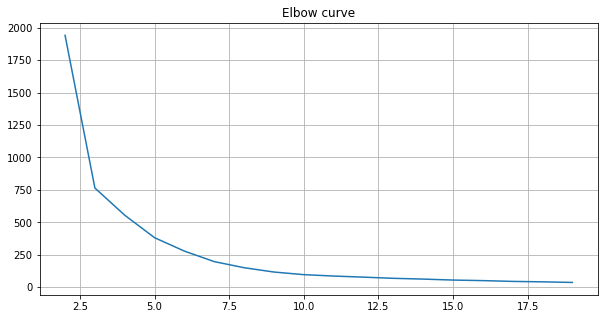

In [83]:
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vector_df)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

### CLUSTERING

In [10]:
n_clusters = 17

print(X)

kmeans = KMeans(n_clusters=n_clusters).fit(X)

#result_by_sklearn = X.copy()
# result_by_sklearn["cluster"] = kmeans.labels_
#result_by_sklean.head()

labels = kmeans.labels_
centers = kmeans.cluster_centers_

review_data['ClusterLabels'] = labels
# review_data['Centers'] = centers


  (0, 3009)	0.31622776601683794
  (0, 9655)	0.31622776601683794
  (0, 13554)	0.31622776601683794
  (0, 15773)	0.31622776601683794
  (0, 17457)	0.31622776601683794
  (0, 18319)	0.31622776601683794
  (0, 18322)	0.31622776601683794
  (0, 23410)	0.31622776601683794
  (0, 27032)	0.31622776601683794
  (0, 27296)	0.31622776601683794
  (1, 11569)	0.7071067811865475
  (1, 30695)	0.7071067811865475
  (2, 337)	0.3333333333333333
  (2, 4511)	0.3333333333333333
  (2, 4515)	0.3333333333333333
  (2, 10113)	0.3333333333333333
  (2, 11861)	0.3333333333333333
  (2, 14556)	0.3333333333333333
  (2, 21025)	0.3333333333333333
  (2, 29628)	0.3333333333333333
  (2, 30345)	0.3333333333333333
  (4, 4159)	0.7071067811865475
  (4, 10575)	0.7071067811865475
  (5, 10467)	0.3779644730092272
  (5, 10880)	0.3779644730092272
  :	:
  (11203, 20172)	0.2581988897471611
  (11203, 21874)	0.2581988897471611
  (11203, 21936)	0.2581988897471611
  (11203, 23335)	0.2581988897471611
  (11203, 23886)	0.2581988897471611
  (11203, 2

In [42]:
# review_data.head()

,가게번호,유저이름,날짜,별점,사진,메뉴,리뷰,긍/부정,nlpdata,ClusterLabels
0,1,gh**,2021-07-28,5,yes,육개장/1+등심돈까스/1(공기밥 추가(공기밥추가)),지난 주에도 시켰는데 괜찮아서 또 시켰네요~ 배달 속도도 빠르고 음식도 만족스럽습니다ㅎㅎ,1,NaN,0
1,1,ma**,2021-07-27,5,yes,쫄면Set（쫄면＋오뎅＋김밥）/1(김밥 선택(변경 안함))+돈까스Set（등심돈까스＋우...,푸짐하게 잘 먹었습니다.,1,NaN,1
2,1,en**,2021-07-27,2,no,천국김밥/2+콩국수/2(곱빼기 추가 선택(곱빼기 추가)),콩국수 꼽빼기 2개는 양도 맛도 별로임 꽁국수 메뉴추가는 패착인듯,-1,NaN,0
3,1,mk**,2021-07-26,5,no,고기만두/1+등심돈까스/1+쫄면Set（쫄면＋오뎅＋김밥）/1(김밥 선택(참치김밥으로 ...,........,1,NaN,0
4,1,be**,2021-07-26,5,yes,천국김밥/2+계란말이김밥/1+떡볶이/1+물냉면/3,김밥이 맛있습니다요,1,NaN,0


### Cluster visualization

In [1]:
import seaborn as sns
